# Pattern Recognition 2019 - 2020
## First Set of Analytical Exercises
#### Christos Lamprakos, 03002910

### Exercise 1.4b

As derived in question **a**, the likelihood function is non-zero if and only if the following conditions hold:

$$x_i \geq 0 \, \forall \,i \in \{ 0, 1 ... n \} \\ max\{ x_1, x_2 ... x_n \} \leq \theta$$

Then, its value is given by $L(\theta) = ({1 \over \theta})^n$, and the maximum likelihood solution is given by $\hat{\theta}=max\{ x_1, x_2 ... x_n \}$.

The code snippet below plots $L(\theta)$ for $0 \leq \theta \leq 1$. 

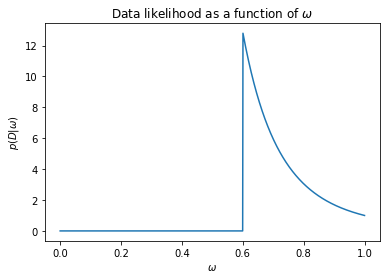

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Given by the exercise
n = 5
#Make theta array
theta = np.linspace (0, 1, 1000)
#Likelihood is zero everywhere...
y = np.zeros (theta.size)
#...except from where theta is equal or greater than the max likelihood estimate!
y[theta >= 0.6] = theta[theta >= 0.6] ** (-n)
plt.plot (theta, y)
#For some reason, Python doesn't want to show $\theta$. We replaced it with $\omega$
plt.ylabel ('$p(D|\omega)$')
plt.xlabel ('$\omega$')
plt.title ('Data likelihood as a function of $\omega$')
plt.show ()

In [2]:
def factorial (x):
    if x == 0:
        return 1
    else:
        return x * factorial (x - 1)

def binomial (n, k):
    return int (factorial (n) / (factorial (k) * factorial (n - k)))

def longsum (n, begin, end):
    s = 0
    for i in range (begin, end + 1):
        s = s + binomial (n, i)
    return int (s)

### Exercise 1.6a

We first create the sample vectors:

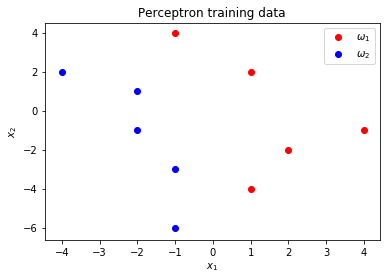

In [3]:
x_1 = np.array ([-1, 1, 2, 1, 4])
y_1 = np.array ([4, 2, -2, -4, -1])
x_2 = np.array ([-4, -2, -2, -1, -1])
y_2 = np.array ([2, 1, -1, -3, -6])

fig = plt.figure ()
ax = fig.add_subplot(111)
ax.scatter (x_1, y_1, color = 'red', label = '$\omega_1$')
ax.scatter (x_2, y_2, color = 'blue', label = '$\omega_2$')
plt.legend (loc = 'best')
plt.xlabel ('$x_1$')
plt.ylabel ('$x_2$')
plt.title ('Perceptron training data')
plt.show ()

The dataset is linearly separable. Moving on to the perceptron training now. The first thing we should note is that the weight vector $\textbf{w} = [0, 0]^T$ is **not** enough, since it does not contain a bias term. Without a bias, the line drawn by the perceptron is obligated to cross the origin, and the training is either not flexible enough or impossible. For this reason, we expand all vectors according to the following form of the discriminant function:

$$g(\textbf{x})=\textbf{w}^T\textbf{x}+b \\ g(\textbf{x}) = \textbf{w}_e^T\textbf{x}_e \\ \textbf{w}_e = [b \ \ \textbf{w}]^T \\ \textbf{x}_e = [1 \ \  \textbf{x}]^T$$

We also merge all of our data in a single array (```train_data```), for easier manipulations. Each row of the array corresponds to a ```(features, pattern)``` tuple.

In [4]:
data_1 = np.vstack ((np.ones (x_1.size), x_1, y_1, np.zeros (x_1.size)))
data_2 = np.vstack ((np.ones (x_2.size), x_2, y_2, np.ones (x_2.size)))
train_data = np.vstack ((data_1.T, data_2.T))

w = np.array ([0, 0, 0])

Next, we define the perceptron training function. The main idea is to feed the perceptron repeatedly with the dataset, and stop training when it classifies all samples correctly.

Finished! Final weights are:  [4. 8. 2.]


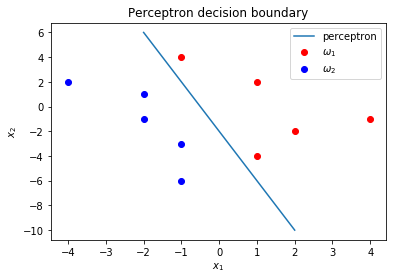

In [5]:
def perc_train (ro, weights, data):
    finished = False
    while not finished:
        #In each epoch, we initially shuffle the training data.
        np.random.shuffle (data)
        #Then split the data in features and patterns.
        features = data[:, :3]
        patterns = data[:, 3]
        #We also assume that each epoch will be the last, unless misclassification happens.
        finished = True
        for i in range (data.shape[0]):
            #Calculate dot product
            res = np.dot (weights, features[i, :])
            #Learning rule
            if patterns[i] == 0 and res <= 0:
                weights += ro * features[i, :]
                finished = False
            elif patterns[i] == 1 and res >= 0:
                weights -= ro * features[i, :]
                finished = False
    print ('Finished! Final weights are: ', weights)
    return weights

final_weight = perc_train (1.0, w.astype (float), train_data)
x_lin = np.linspace (-2, 2, 1000)
fig = plt.figure ()
ax = fig.add_subplot(111)
ax.scatter (x_1, y_1, color = 'red', label = '$\omega_1$')
ax.scatter (x_2, y_2, color = 'blue', label = '$\omega_2$')
ax.plot (x_lin, - final_weight[1] / final_weight[2] * x_lin - final_weight[0] / final_weight[2], label = 'perceptron')
plt.legend (loc = 'best')
plt.xlabel ('$x_1$')
plt.ylabel ('$x_2$')
plt.title ('Perceptron decision boundary')
plt.show ()

The equation describing the perceptron decision boundary is thus:

$$b+w_1x_1+w_2x_2 = 0 \\ 4 + 8x_1+2x_2 = 0 \\ 2 + 4x_1 + x_2 = 0$$

### Exercise 1.7

The first thing we should do is create the dataset.

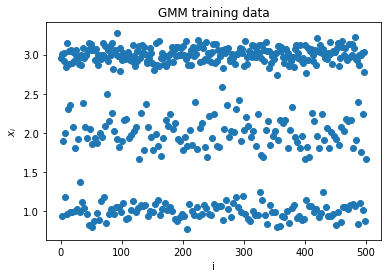

In [22]:
def mixtureData (pointsNum):
    points = np.array ([])
    base = 0
    for i in range (pointsNum):
        if base == 0 or base == 1:
            points = np.hstack ((points, np.random.normal (3, 0.1)))
            base += 1
        elif base == 2:
            points = np.hstack ((points, np.random.normal (1, 0.1)))
            base += 1
        else:
            points = np.hstack ((points, np.random.normal (2, 0.2)))
            base = 0
    return points

data = mixtureData (500)
x = np.arange (500) + 1
fig = plt.figure ()
ax = fig.add_subplot (111)
ax.scatter (x, data)
plt.xlabel ('i')
plt.ylabel ('$x_i$')
plt.title ('GMM training data')
plt.show ()

As can be seen above, the samples are indeed centered around the corresponding means. The over-representation of the second Gaussian, centered around 3, is also observable. The same holds for the larger spread of the third Gaussian.

To continue, we use the formulation of the EM algorithm as it is described in Bishop 9.2.2. We initialize $\mu_k$, $\sigma_k$ and $\pi_k$ with the help of a K-means pre-processing step

In [143]:
from sklearn.cluster import KMeans

buddy = KMeans (n_clusters = 3).fit (data.reshape (-1, 1))
m_k = buddy.cluster_centers_
labels = buddy.labels_

#To write a function which computes sample covariances and mixing coefficients
#from resulted clusters.

#If k-means does a good job on its own, I will have to comment.

array([[2.00753369],
       [3.0021118 ],
       [0.99923861]])

In [131]:
def getGauss (point, mean, var):
    return 1 / (np.sqrt (2 * np.pi * var)) * \
           np.exp (- (point - mean) ** 2 / (2 * var))

def expect (m_k, s_k, pi_k, data):
    g_nk = np.zeros ((data.shape[0], 3))
    for i in range (data.shape[0]):
        s = 0
        for j in range (3):
            s += pi_k[j] * getGauss (data[i], m_k[j], s_k[j])
        for j in range (3):
            g_nk[i, j] = pi_k[j] * getGauss (data[i], m_k[j], s_k[j]) / s
    return g_nk

def maxim (g_nk, data):
    n_k = g_nk.sum (axis = 0)
    pi_new = n_k / data.shape[0]
    gx = g_nk.T * data
    mk_new = gx.sum (axis = 1) / n_k
    base = np.ones ((3, data.shape[0]))
    data_exp = (base * data).T
    gy = g_nk * (data_exp - mk_new) ** 2
    sk_new = gy.sum (axis = 0) / n_k
    return mk_new, sk_new, pi_new

def eMWrapper (m_new, s_new, pi_new, data):
    for i in range (50):
        new_g = expect (m_new, s_new, pi_new, data)
        m_new, s_new, pi_new = maxim (new_g, data)
        print ('New g: ', new_g)
        print ('New m: ', m_new)
        print ('New s: ', s_new)
        print ('New pi: ', pi_new)    